In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
from sklearn.datasets import make_regression
x,y = make_regression(n_features = 1, n_samples = 5000, bias = 4, noise = 15)
x = x.reshape((-1,))
y = y.reshape((-1,))
print(x.shape,y.shape)

(5000,) (5000,)


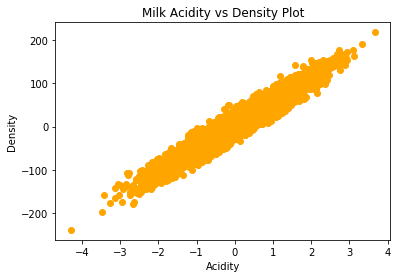

In [6]:
x = (x - x.mean())/x.std()
plt.scatter(x,y,color = 'orange')
plt.xlabel ("Acidity")
plt.ylabel("Density")
plt.title("Milk Acidity vs Density Plot")
plt.show()

In [7]:
def hypothesis(x,theta):
    return theta[0] + theta[1]*x

In [14]:
def error(X,Y,theta):
    m = Y.shape[0]
    total_error = 0
    for i in range(m):
        h = hypothesis(X[i],theta)
        e = (Y[i] - h)**2
        total_error +=e
    return total_error/2

In [15]:
def gradient(X,Y,theta):
    m = Y.shape[0]
    grad = np.zeros((2,))
    
    
    for i in range(m):
        h = hypothesis(X[i],theta)
        grad[0] += (Y[i]-h)
        grad[1] += (Y[i]-h)*X[i]
        
    return grad*.5

In [21]:
def batch_gradient(X,Y,theta,batch_size = 1):
    m = Y.shape[0]
    indices = np.arange(m)
    np.random.shuffle(indices)
    indices = indices[:batch_size]
    grad = np.zeros((2,))
    for i in indices:
        h  = hypothesis(X[i],theta)
        grad[0] += (Y[i] - h)
        grad[1] += (Y[i] - h)*X[i]
    return grad * 0.5

In [31]:
def gradientDescent(X,Y,learning_rate = 0.1):
    theta = np.zeros((2,))
    e = error(X,Y,theta)
    itr = 0
    error_list = [e]
    
    while(itr<=300):
        grad = batch_gradient(X,Y,theta)
        theta = theta +learning_rate*grad
        ne = error(X,Y,theta)
        
        if(itr%10):
            error_list.append(ne)
            
        itr +=1
        
    return error_list,theta

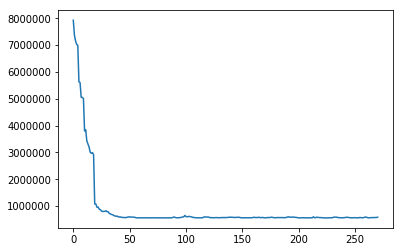

In [32]:
e,theta = gradientDescent(x,y)
plt.plot(e)
plt.show()

In [33]:
def drawLine(theta):
    x_pts = np.linspace(-4,4,10)
    y_pts = hypothesis(x_pts,theta)
    plt.scatter(x,y)
    plt.plot(x_pts,y_pts,color = 'black')

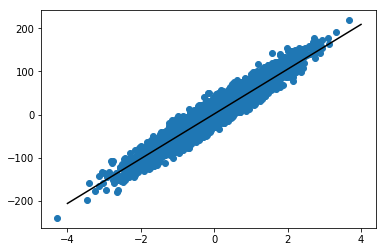

In [34]:
drawLine(theta)

In [35]:
# note that the error function is not smooth because the 
# gradient function is an approximated one

In [37]:
# reduce learning_rate to 0.01 and see that it will now take more time

In [38]:
# with batch size = 1,it is called stochastic gradient descent

In [40]:
# also try different batch sizes

In [41]:
# as the batch size increases, since we are taking the sum
# and not the average, we need to decrease the learning_rate
# as well

In [43]:
# if we don't do so, our algorithm will converge early

In [45]:
# the curve becomes more smooth as the batch size increases

In [46]:
# what should be the convergence criteria now ?

In [47]:
# we cannot take delta e because gradient might jump

In [49]:
# compute the average error over the last (some number of ) epochs, and check if it is 
# less than some threshold or change in the average error is less than some threshold